
# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system

# To build linear regression_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To check model performance
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score



***Read the dataset***

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Study/MDS_UTexas/4_SupervisedLearningClassification/Project_INN_Hotels/INNHotelsGroup.csv')
data_bk=pd.read_csv('/content/drive/MyDrive/Study/MDS_UTexas/4_SupervisedLearningClassification/Project_INN_Hotels/INNHotelsGroup.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# let's check the first 5 rows of the data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# let's check the last 5 rows of the data
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")
print(data.shape)

There are 36275 rows and 19 columns.
(36275, 19)


In [ ]:
# let's check column types and number of values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
#checking some basic stas for the numeric columns
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
### Checking for null values in the data
data.isnull().values.any()

False

**Observations:**
* There are 36275 observations and 19 columns in the dataset
*   All columns seems to have the right data type Dtype as per the expected type based in the top 5 columns
*   There are no columns with missing/null 
*   Al parecer al menos 75% de las reservaciones han sido ocupados por nada mas 2 adultos sin niños ni acompañantes.




## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?

  **it seems the busiests top 3 months are in descending order October, September and August, being October the busiest one.**
2. Which market segment do most of the guests come from?

   **as per an initial count "Online" is the segment where most of the customers come from**
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

   **Aviation:** Prices are very constant and look don't vary too much. They have a mean average price than the other categories(avg mean prices), except than online.
**Complimentary:** It has very low prices in general due the nature of this category that is meant to be provided as complimentary usually for VIP client or due a error/mistakes/bad service of the hotel.
**Corporate:** They have a lower mean/median price than all categories except complimentary. So they have been offerred the best prices in general, maybe due commerce alliances, special offer due high volumes of booking, among others.
**Offline:** They have higher rate than all categories except than "online", not sure yet what might be the cause compared to online.
**Online:** It the one thas is offered the max prices in general. Assuming "online" means People and not companies, then the case might be related with the risk of purchasing online so cancellation might be easily done online too at any pointing time, however this is just a conjecture.
4. What percentage of bookings are canceled? 
   **32.7%** of bookings are cancelled
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
**only 1.7%** of reapeated guests cancel which looks like a very acceptable/reasonable rate
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

There migh be some correlation between cancellations and special requirements. Actually for 9% of the observations books where cancelled for cases when special requirementes were 1 or 2. There are no cancellations for bookings with special requirements of 3,4 or 5. For observations with 1 requirement 31% of them were cancelled, For observations with 2 requirements 17% of them were cancelled.

In [ ]:
##What are the busiest monhts in the hotel:
data.groupby(['arrival_month'])['Booking_ID'].aggregate(['count']).reset_index().sort_values('count', ascending=False)

,arrival_month,count
9,10,5317
8,9,4611
7,8,3813
5,6,3203
11,12,3021
10,11,2980
6,7,2920
3,4,2736
4,5,2598
2,3,2358


In [ ]:
##answering --> Which market segment do most of the guests come from?
data.groupby(['market_segment_type'])['Booking_ID'].aggregate(['count']).reset_index().sort_values('count', ascending=False)


,market_segment_type,count
4,Online,23214
3,Offline,10528
2,Corporate,2017
1,Complementary,391
0,Aviation,125


In [ ]:
# Answering question 3: What are the differences in room prices in different market segments?
#data.groupby(['market_segment_type','room_type_reserved'])[['avg_price_per_room']].mean()
data.groupby(['market_segment_type']).agg({'avg_price_per_room': ['mean', 'min', 'max', 'median']})                                                       


avg_price_per_room                    
                                  mean   min    max median
market_segment_type                                       
Aviation                    100.704000  79.0  110.0   95.0
Complementary                 3.141765   0.0  170.0    0.0
Corporate                    82.911740  31.0  220.0   79.0
Offline                      91.632679  12.0  540.0   90.0
Online                      112.256855   0.0  375.5  107.1

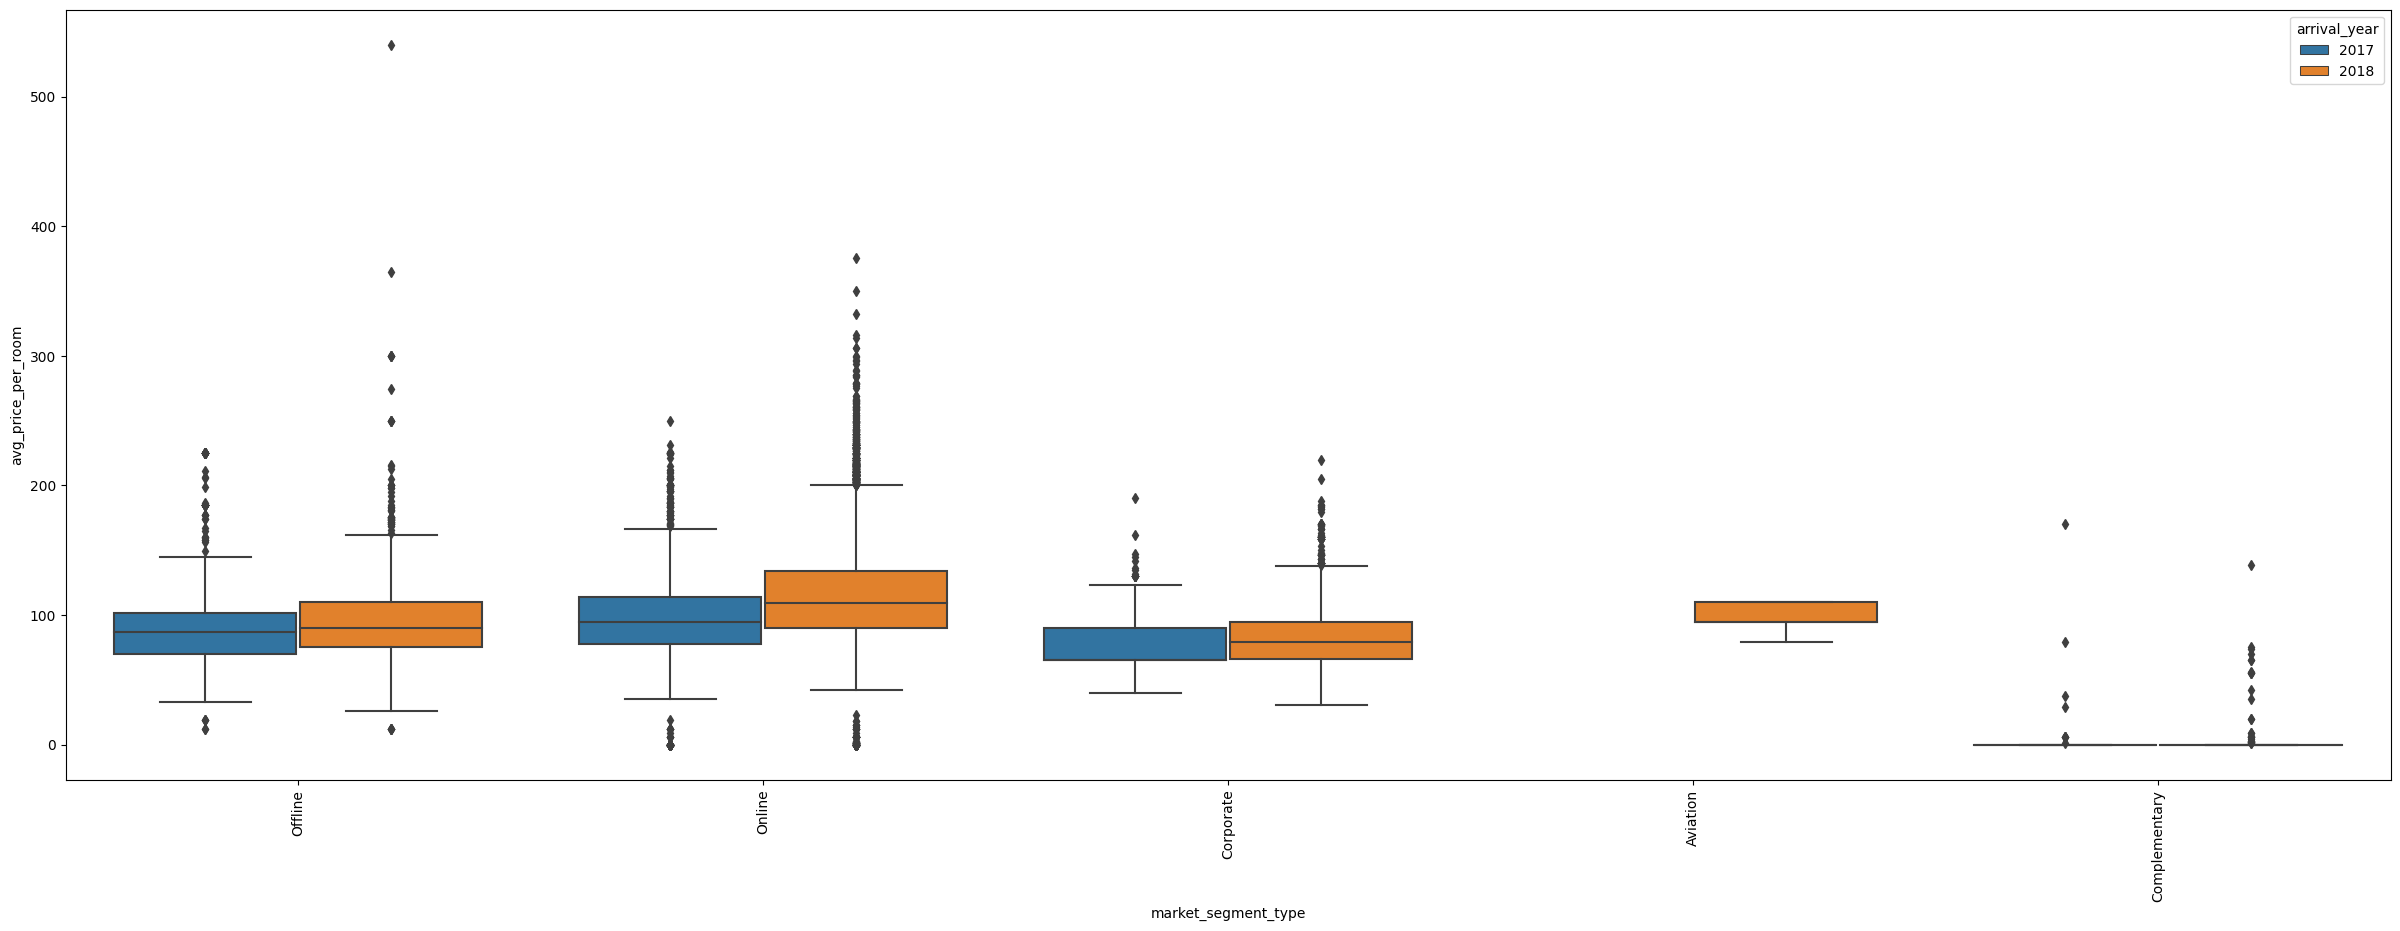

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=data,x='market_segment_type', y='avg_price_per_room',hue='arrival_year')
plt.xticks(rotation=90);
plt.show();

In [ ]:
# Answering question 4:What percentage of bookings are canceled?
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

In [ ]:
# Answering question 5:What percentage of reapeted customers cancel?

#getting repeated guest df
rguest=data[data["repeated_guest"]==1]

#calculating percentage
rguest['booking_status'].value_counts(normalize=True)

Not_Canceled    0.982796
Canceled        0.017204
Name: booking_status, dtype: float64

In [ ]:
#answering question 6: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
#getting count for special requests and booking status
data.groupby(['no_of_special_requests','booking_status'])['Booking_ID'].aggregate(['count']).reset_index().sort_values('booking_status', ascending=True)

,no_of_special_requests,booking_status,count
0,0,Canceled,8545
2,1,Canceled,2703
4,2,Canceled,637
1,0,Not_Canceled,11232
3,1,Not_Canceled,8670
5,2,Not_Canceled,3727
6,3,Not_Canceled,675
7,4,Not_Canceled,78
8,5,Not_Canceled,8


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

**Missing value treatment**

No need of missing value treatment, since there is no missing/na/null data in the dataset

**Feature engineering**

In [ ]:
#replacing yes and no(yes no could be) values with 1 and 0 respectively for prediction purposes of the model
data['booking_status'] = data['booking_status'].replace(['Not_Canceled'],0)
data['booking_status'] = data['booking_status'].replace(['Canceled'],1)
data['type_of_meal_plan'] = data['type_of_meal_plan'].replace(['Not Selected'],0)
data['type_of_meal_plan'] = data['type_of_meal_plan'].replace(['Meal Plan 1'],1)
data['type_of_meal_plan'] = data['type_of_meal_plan'].replace(['Meal Plan 2'],2)
data['type_of_meal_plan'] = data['type_of_meal_plan'].replace(['Meal Plan 3'],3)


#getting dummy variables for OS
data = pd.get_dummies(data, columns=["room_type_reserved"])
data = pd.get_dummies(data, columns=["market_segment_type"])
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,1,0,224,2017,10,...,0,0,0,0,0,0,0,0,1,0
1,INN00002,2,0,2,3,0,0,5,2018,11,...,0,0,0,0,0,0,0,0,0,1
2,INN00003,1,0,2,1,1,0,1,2018,2,...,0,0,0,0,0,0,0,0,0,1
3,INN00004,2,0,0,2,1,0,211,2018,5,...,0,0,0,0,0,0,0,0,0,1
4,INN00005,2,0,1,1,0,0,48,2018,4,...,0,0,0,0,0,0,0,0,0,1


**Outlier detection and treatment**

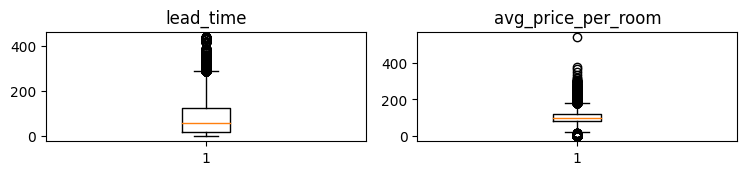

In [ ]:
numeric_columns = ['lead_time', 'avg_price_per_room']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(8, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

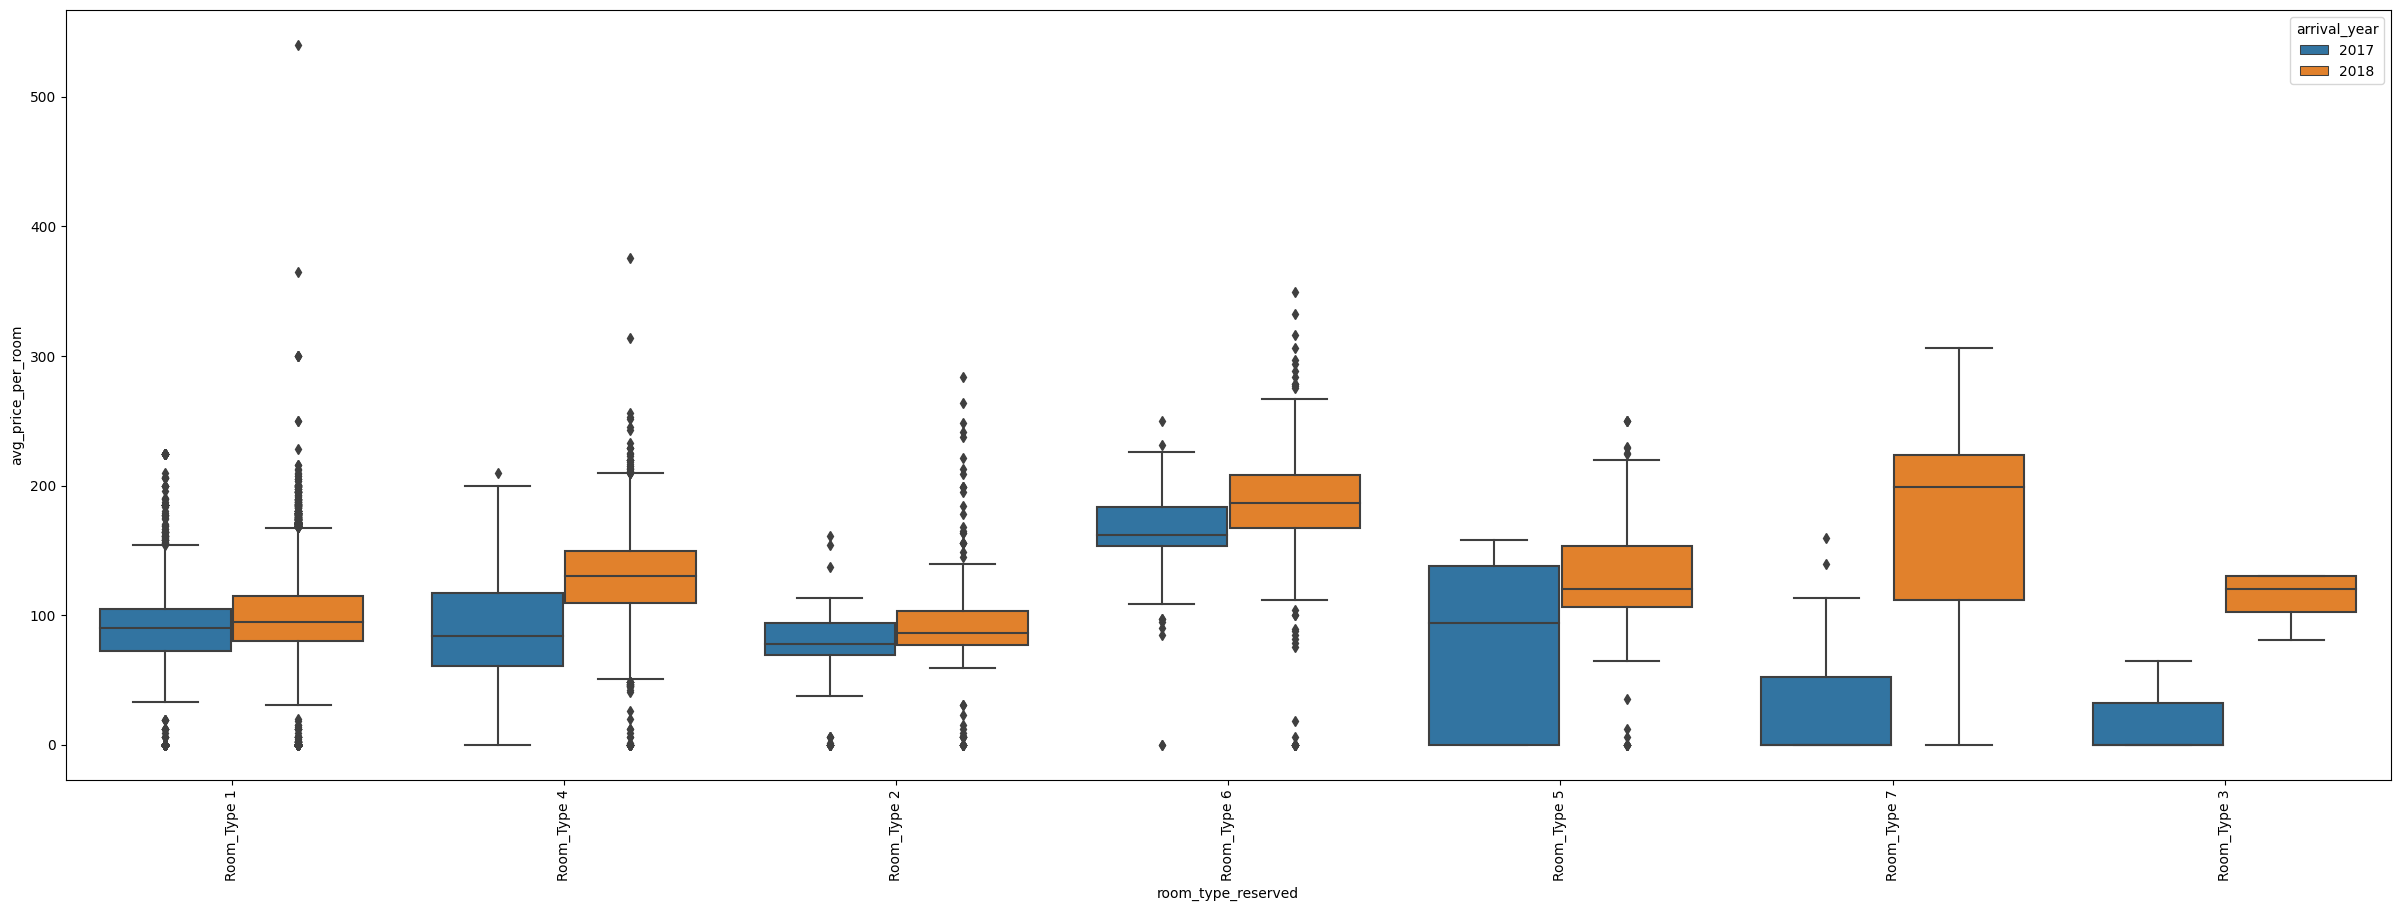

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=data_bk,x='room_type_reserved', y='avg_price_per_room',hue='arrival_year')
plt.xticks(rotation=90);
plt.show();

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
df_numeric = ['no_of_adults',	'no_of_children',	'no_of_weekend_nights',	'no_of_week_nights',	'type_of_meal_plan',	'required_car_parking_space',	'lead_time',	'arrival_year',	'arrival_month',	'arrival_date',	'repeated_guest',	'no_of_previous_cancellations',	'no_of_previous_bookings_not_canceled',	'avg_price_per_room',	'no_of_special_requests',	'booking_status',	'room_type_reserved_Room_Type 2',	'room_type_reserved_Room_Type 3',	'room_type_reserved_Room_Type 4']

Q1 = data[df_numeric].quantile(0.25)
Q3 = data[df_numeric].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
((data[df_numeric] < lower_whisker) | (data[df_numeric] > upper_whisker)).sum()/data.shape[0]*100

no_of_adults                            28.027567
no_of_children                           7.437629
no_of_weekend_nights                     0.057891
no_of_week_nights                        0.893177
type_of_meal_plan                       23.266713
required_car_parking_space               3.098553
lead_time                                3.669194
arrival_year                            17.957271
arrival_month                            0.000000
arrival_date                             0.000000
repeated_guest                           2.563749
no_of_previous_cancellations             0.931771
no_of_previous_bookings_not_canceled     2.238456
avg_price_per_room                       4.675396
no_of_special_requests                   2.097864
booking_status                           0.000000
room_type_reserved_Room_Type 2           1.907650
room_type_reserved_Room_Type 3           0.019297
room_type_reserved_Room_Type 4          16.697450
dtype: float64

In [ ]:
#using function defined in EDA week module
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

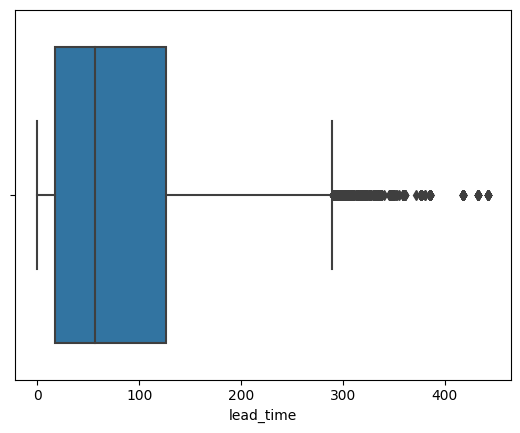

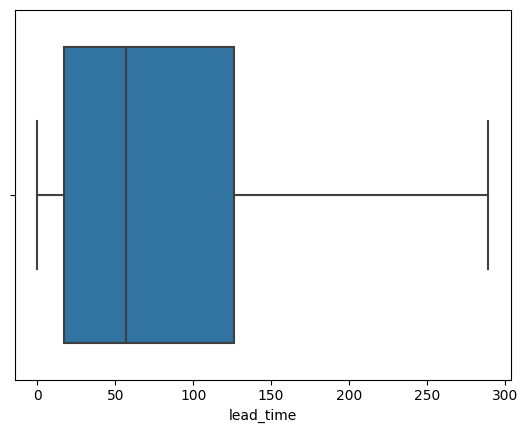

In [ ]:
#seems that only lead_time and avg_price_per_room present some potential outliers
#NONETHELESS for avg_price_per_room has been done and when checking by room_type we can observe the outliers are spread among all room types, and they reduce their variance a bit compared to the general boxplot presented above
# imputing missing values for all colums with na values 'main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight'

#treating outliers for all different colums(Only lead_time colums has been considered as an outlier)

sns.boxplot(data=data,x='lead_time')
plt.show()

doutliers = treat_outliers(data,'lead_time')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='lead_time')
plt.show()

**Preparing data for modeling**

In [ ]:
data.info()
#Booking_ID column will be delete for simulation purposes
data=data.drop('Booking_ID', axis=1)

#converting meal plan to a int type
data.info()                   
data.type_of_meal_plan = data.type_of_meal_plan.astype(int)
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  int64  
 6   required_car_parking_space            36275 non-null  int64  
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

## EDA

- It is a good idea to explore the data once again after manipulating it.

<ipython-input-63-610251071898>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_bk.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


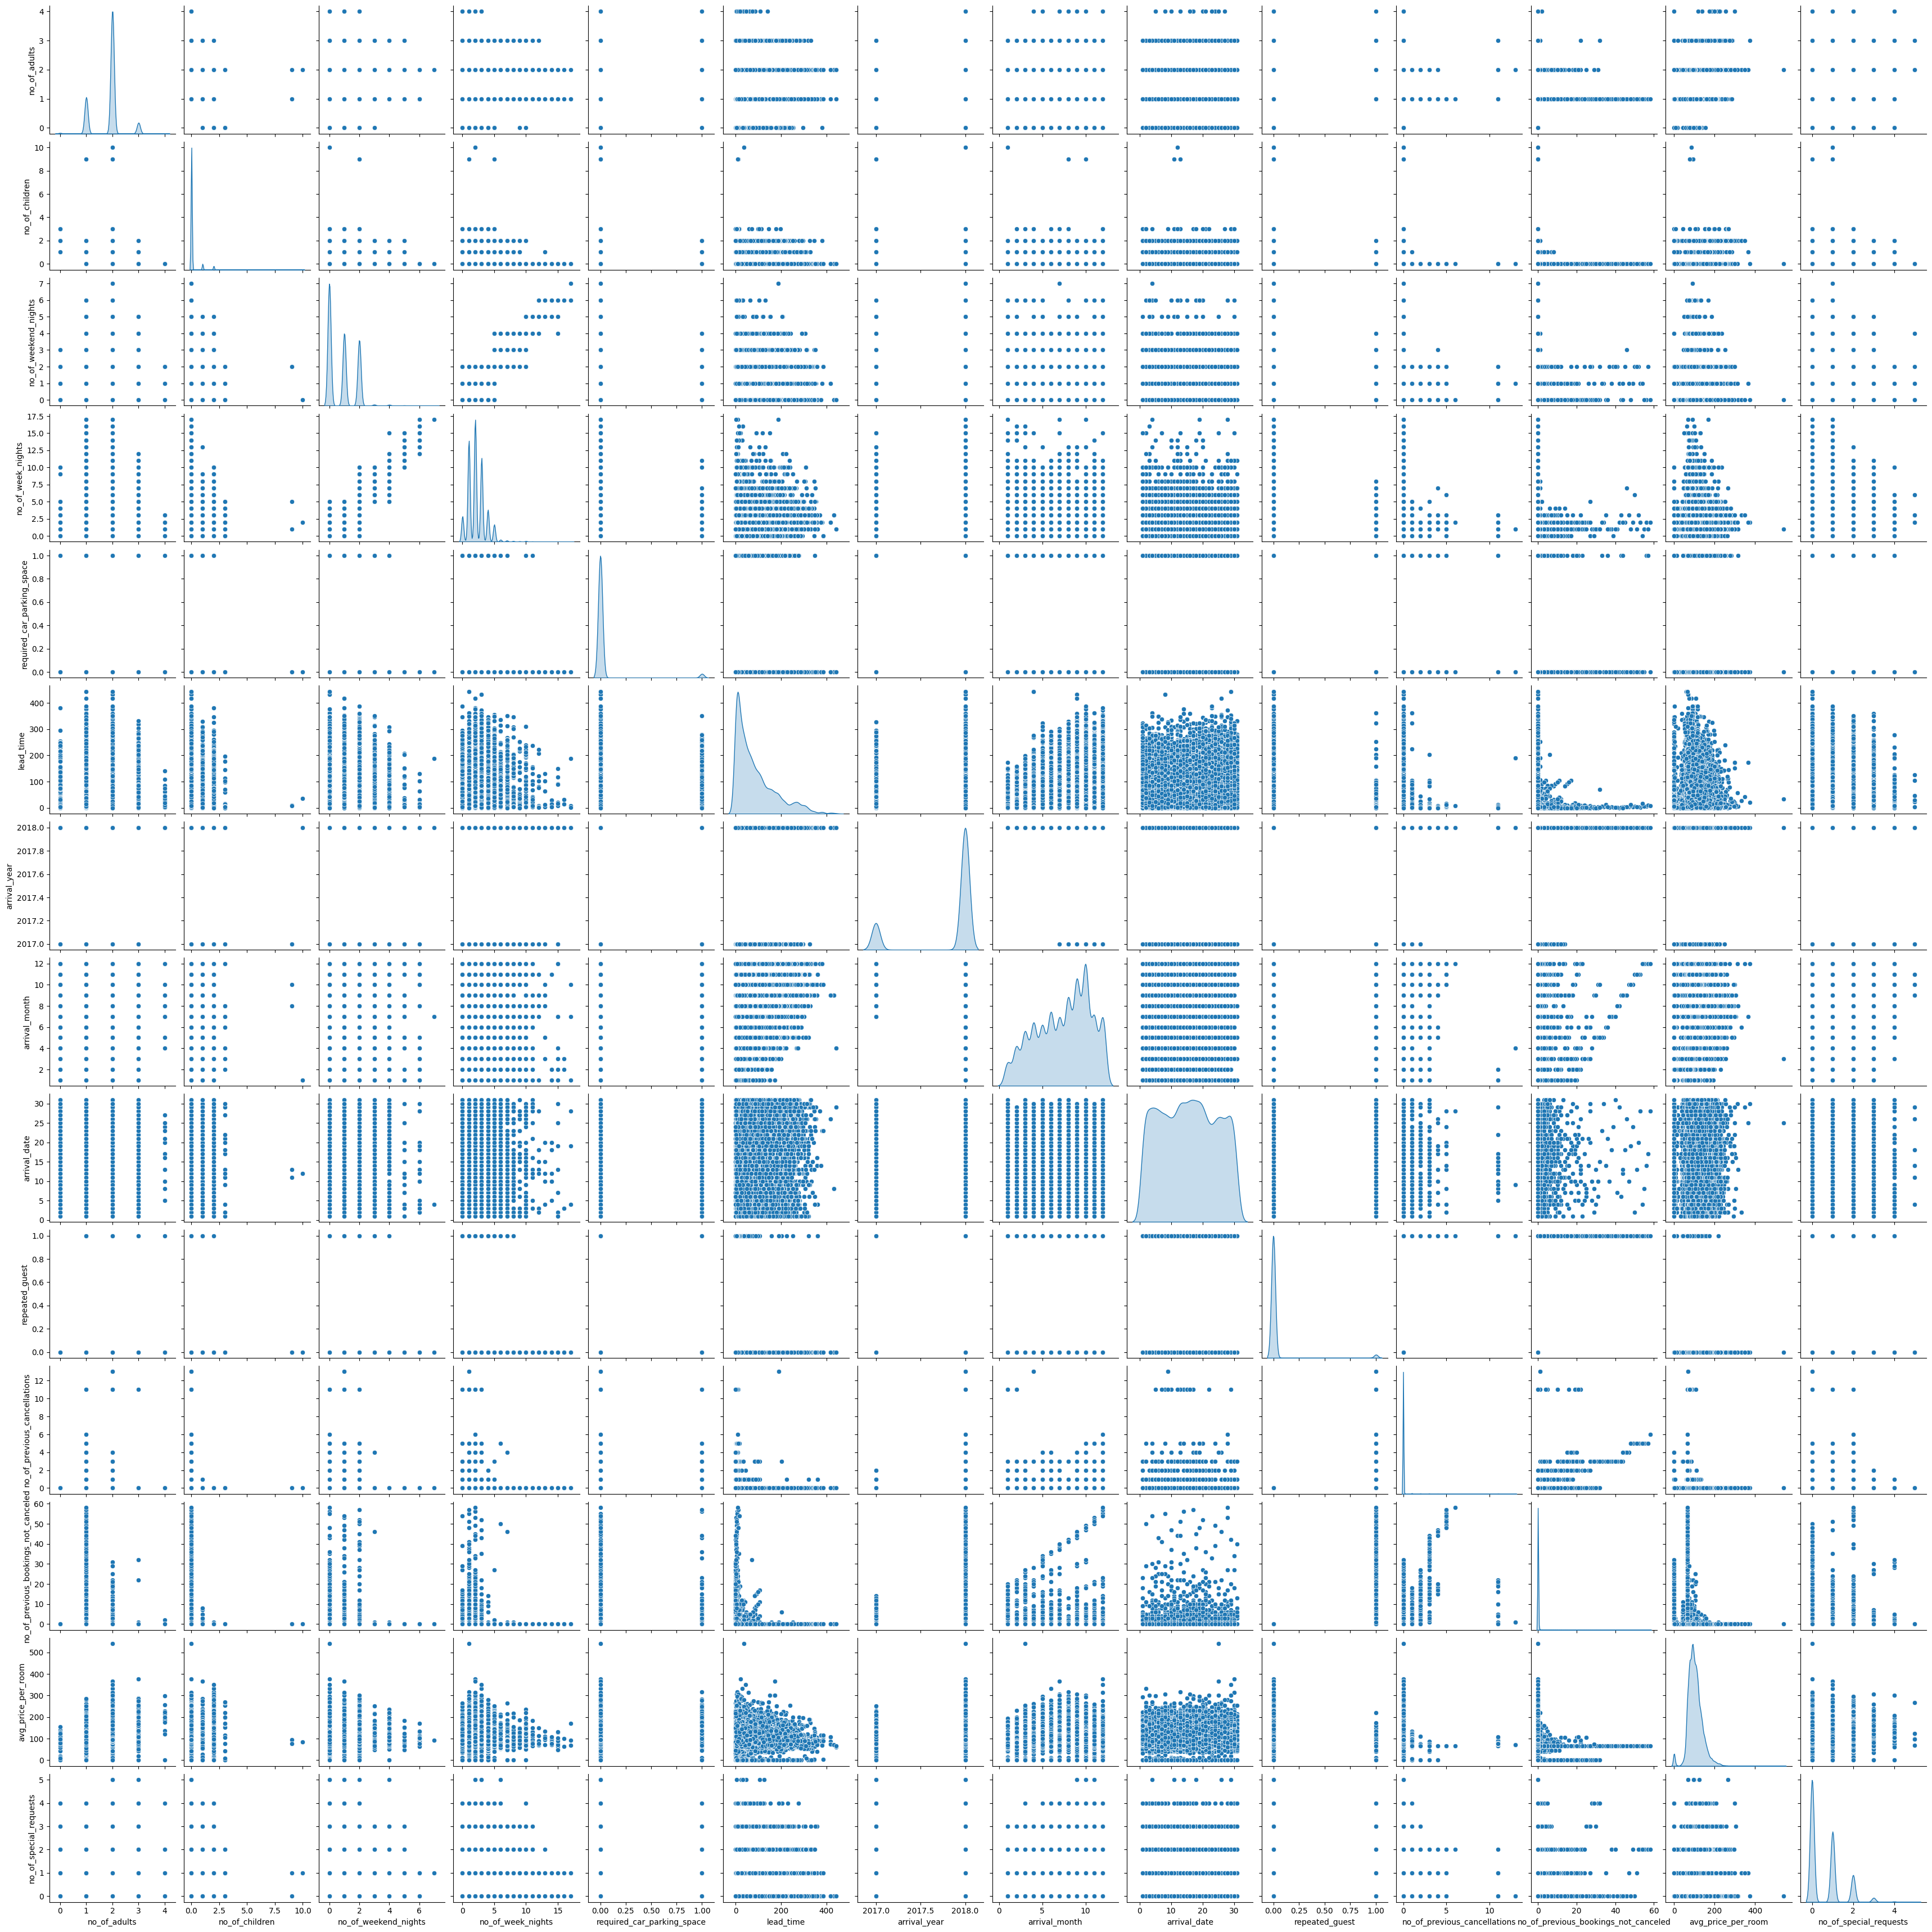

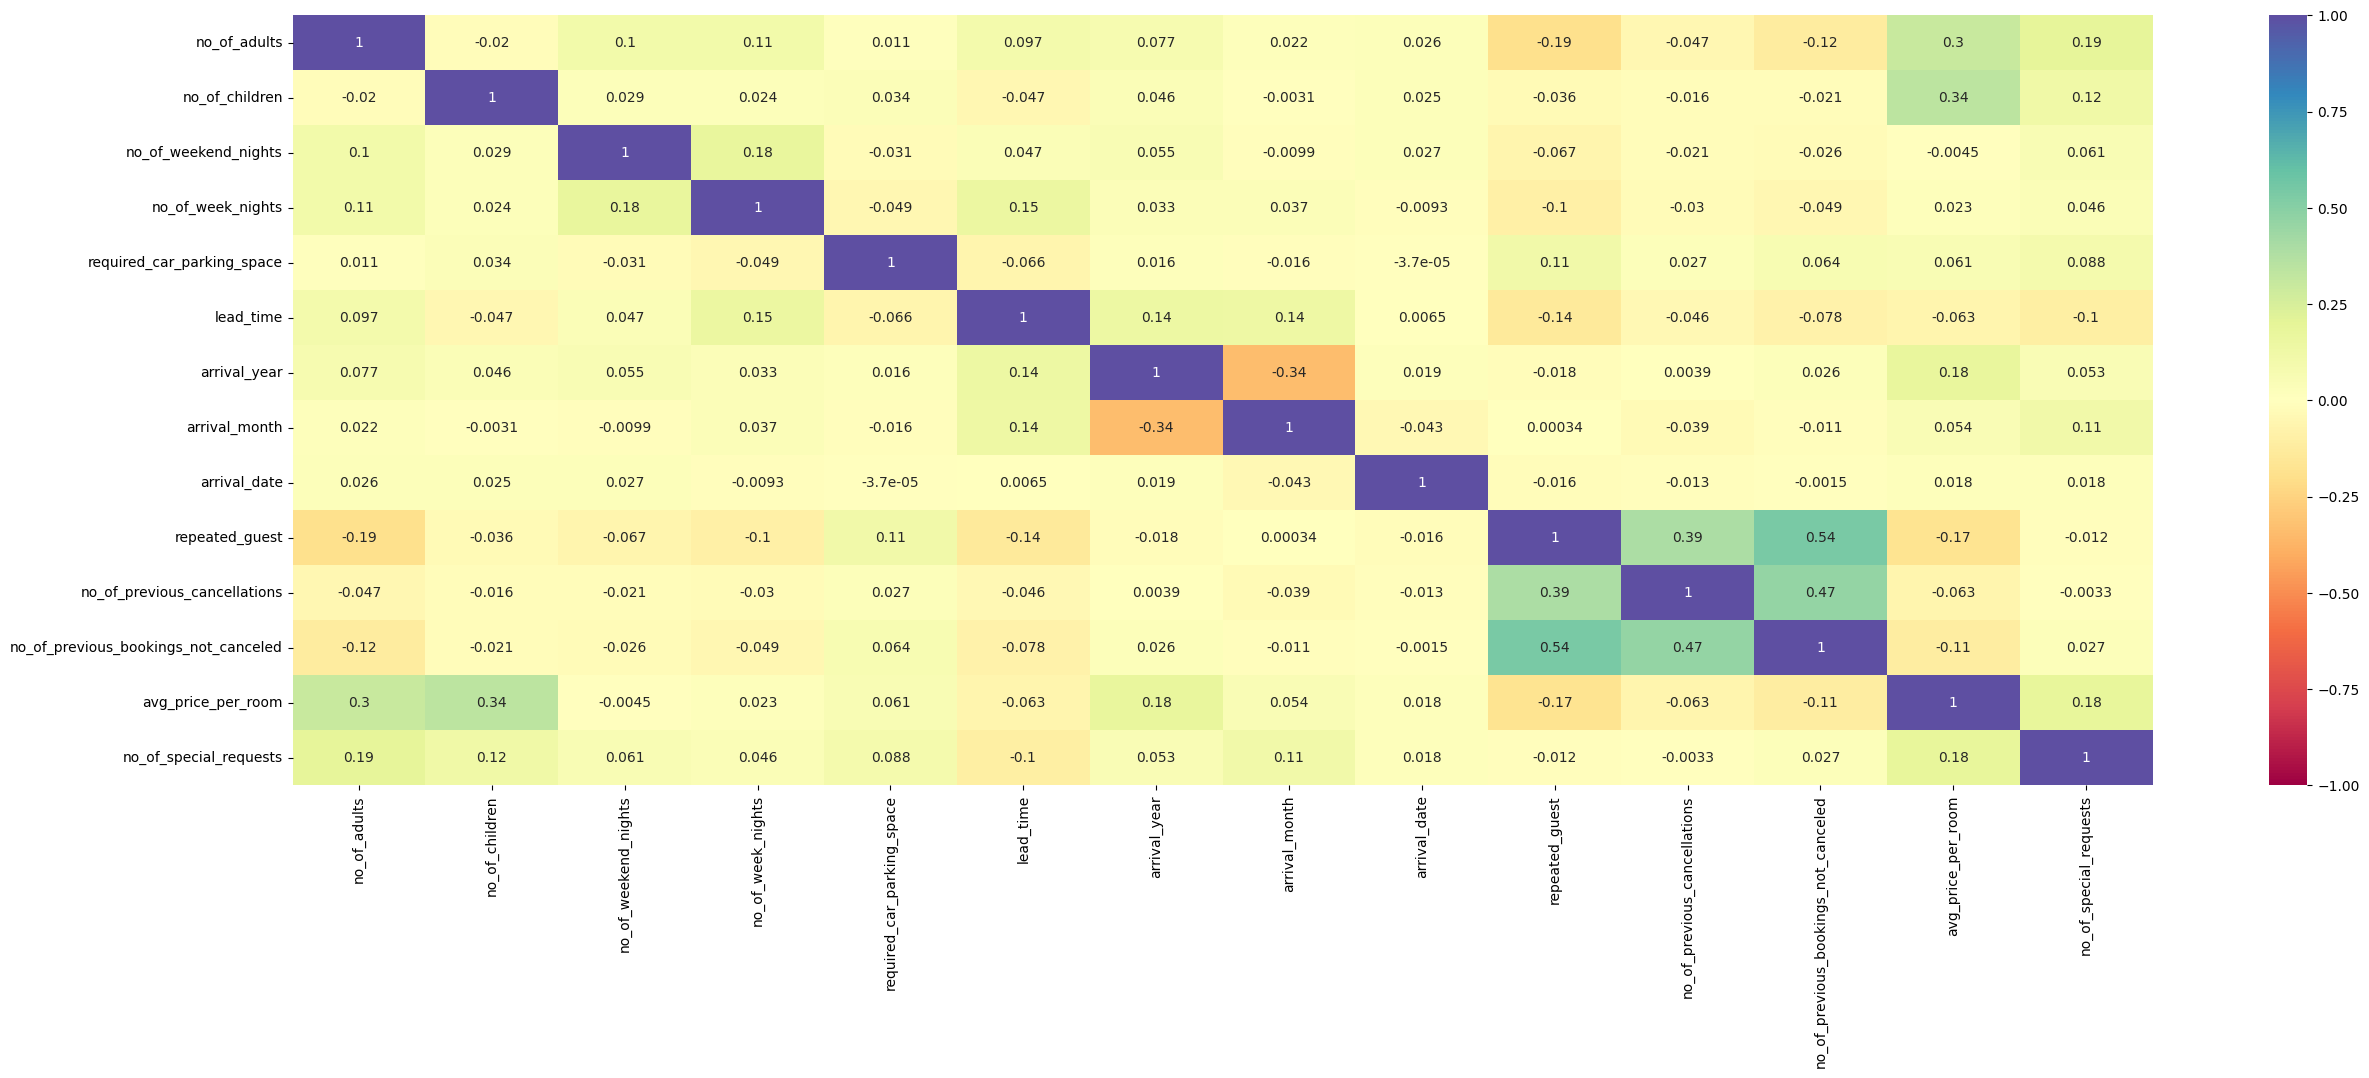

In [ ]:
#ploting pairplot to check correlation between variables
sns.pairplot(data=data_bk,diag_kind="kde")
print("\n\n")

plt.figure(figsize=(30,10))
sns.heatmap(data_bk.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations**
No visible high correlation was found between the variables, check was performed initially with df with processed data then performed with the original data. In both cases no correlation was found

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

**However, since the decision tree is a non-linear model, it is not affected by multicollinearity.**

## Building a Logistic Regression model

In [ ]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,1,0,224.0,2017,10,2,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,0,5.0,2018,11,6,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,1,0,1.0,2018,2,28,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,1,0,211.0,2018,5,20,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,0,48.0,2018,4,11,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,85.0,2018,8,3,...,0,1,0,0,0,0,0,0,0,1
36271,2,0,1,3,1,0,228.0,2018,10,17,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,1,0,148.0,2018,7,1,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,0,63.0,2018,4,21,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = data.drop("booking_status" , axis=1)
y = data.pop("booking_status")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1)

## Model performance evaluation

**Scoring our Decision Tree**

In [ ]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.994210775047259
Accuracy on test set :  0.8733805016998989


**observations**
An acceptable accuracy of test compared(87%) to training(99%) has been reached out! so in the mean time we will keep the model as it is

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

## Confusion Matrix

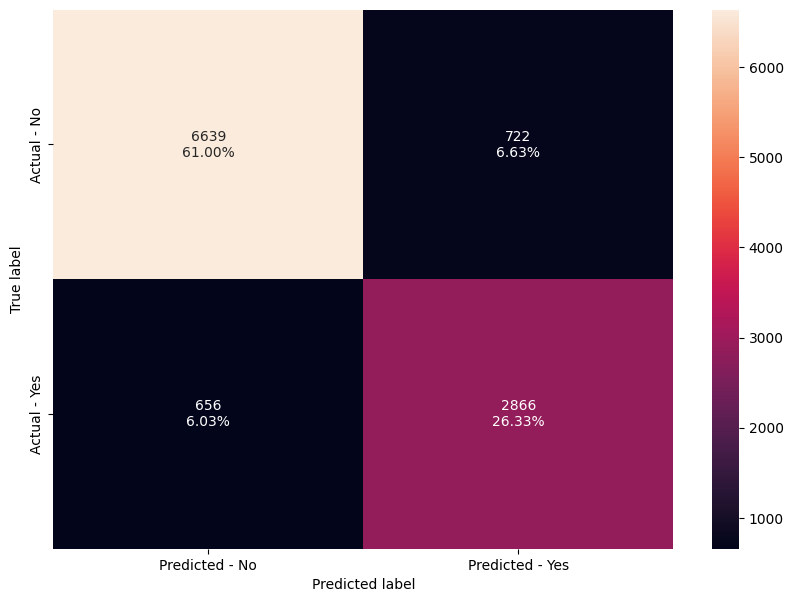

In [ ]:
make_confusion_matrix(dTree,y_test)

## Final Model Summary

In [ ]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  0.9866076766710511
Recall on test set :  0.8137421919363997


## Building a Decision Tree model

In [ ]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


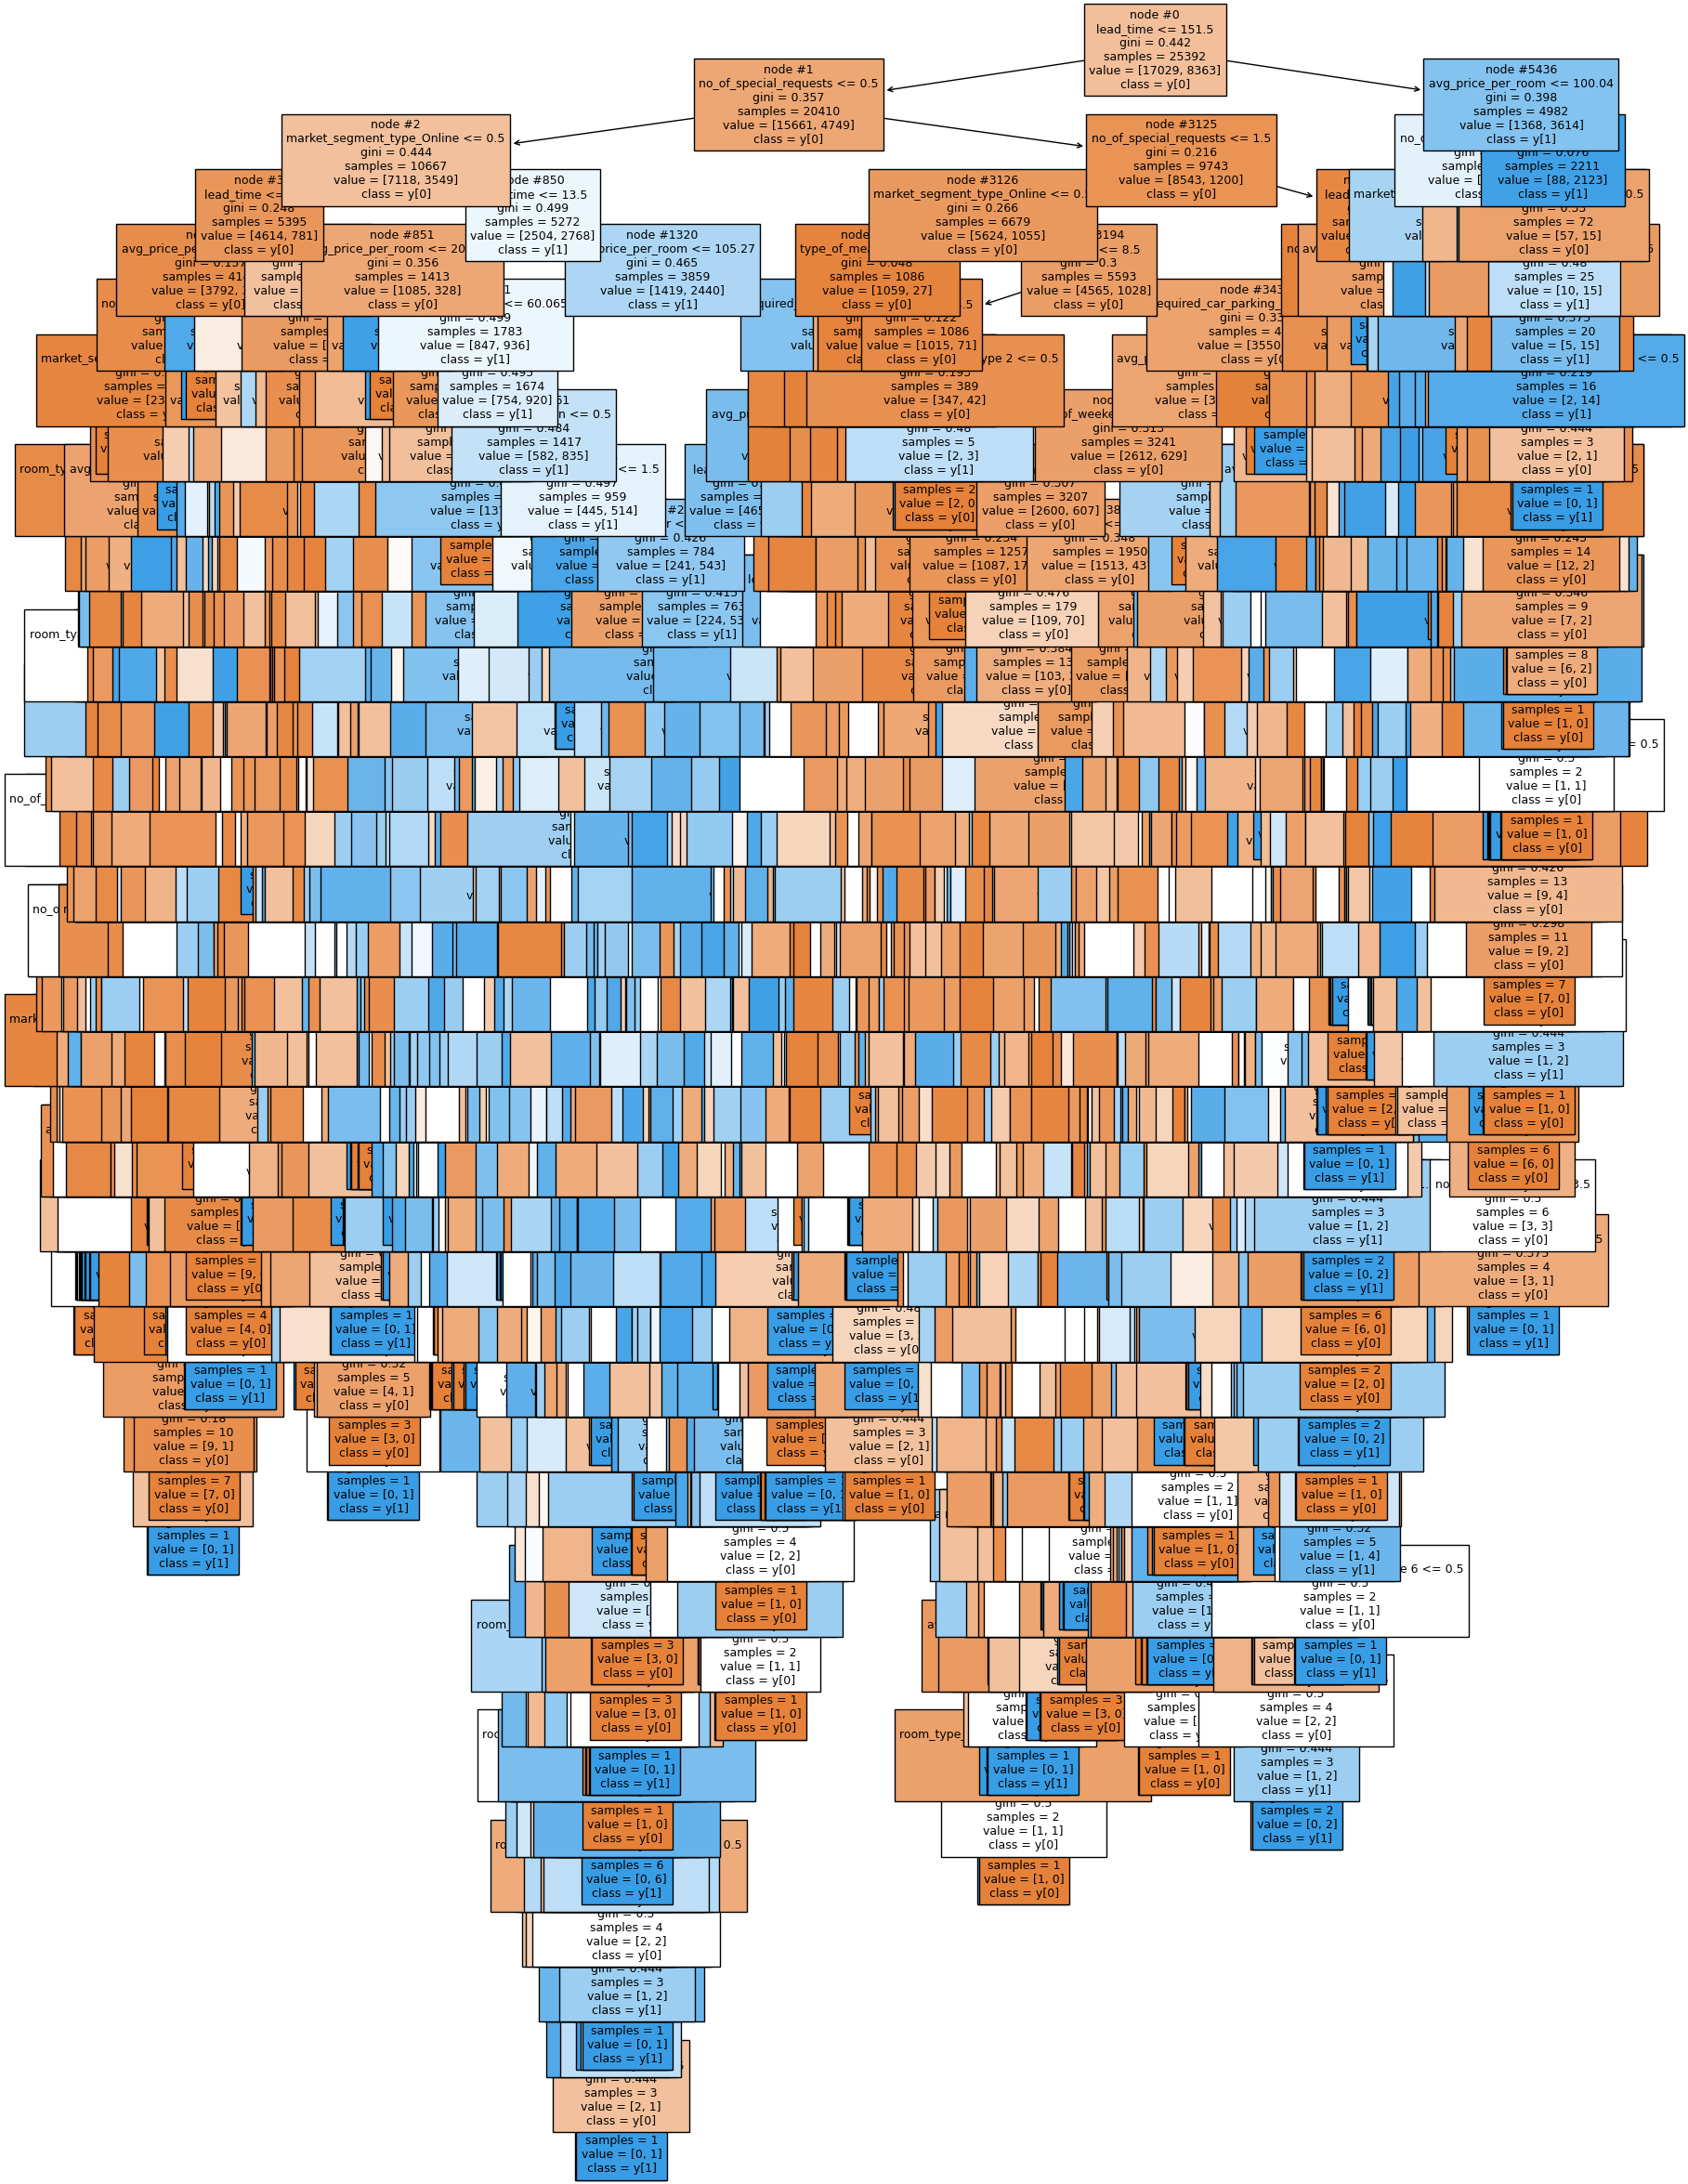

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.348171
avg_price_per_room                    0.176184
market_segment_type_Online            0.093856
arrival_date                          0.084366
no_of_special_requests                0.068019
arrival_month                         0.064610
no_of_week_nights                     0.044810
no_of_weekend_nights                  0.040713
no_of_adults                          0.026490
type_of_meal_plan                     0.011736
arrival_year                          0.011560
required_car_parking_space            0.007060
room_type_reserved_Room_Type 4        0.005394
room_type_reserved_Room_Type 1        0.005238
no_of_children                        0.003457
market_segment_type_Offline           0.002589
room_type_reserved_Room_Type 2        0.001722
room_type_reserved_Room_Type 5        0.001219
repeated_guest                        0.000782
room_type_reserved_Room_Type 6        0.000719
room_type_res

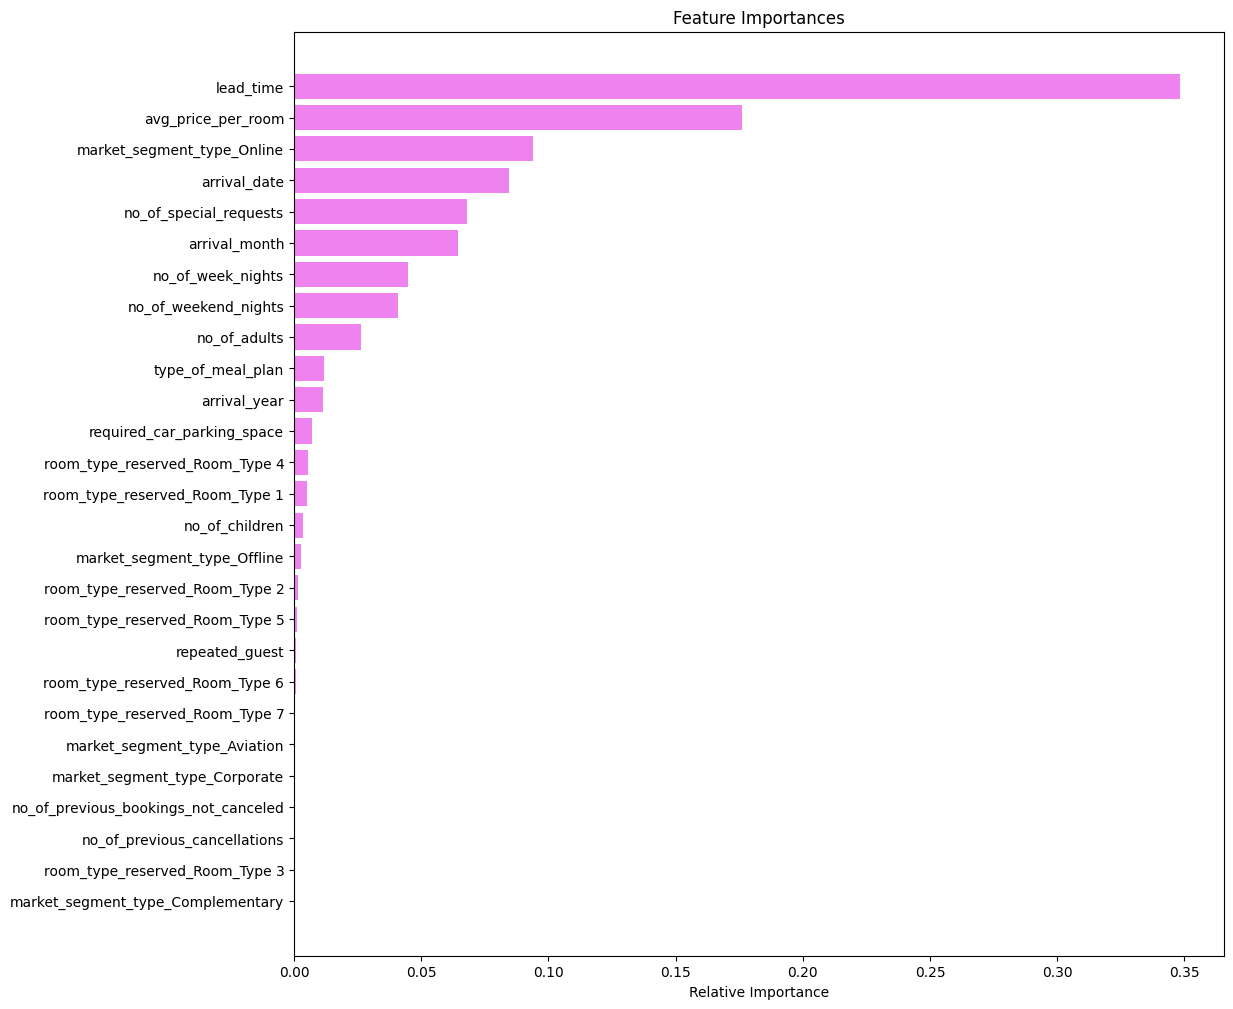

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Do we need to prune the tree?

* Initiall to mention that our tree is extremely complex and could be causing overffiting.
* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 3

**Yes we need to prune the tree**

In [ ]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

## Model Performance Comparison and Conclusions

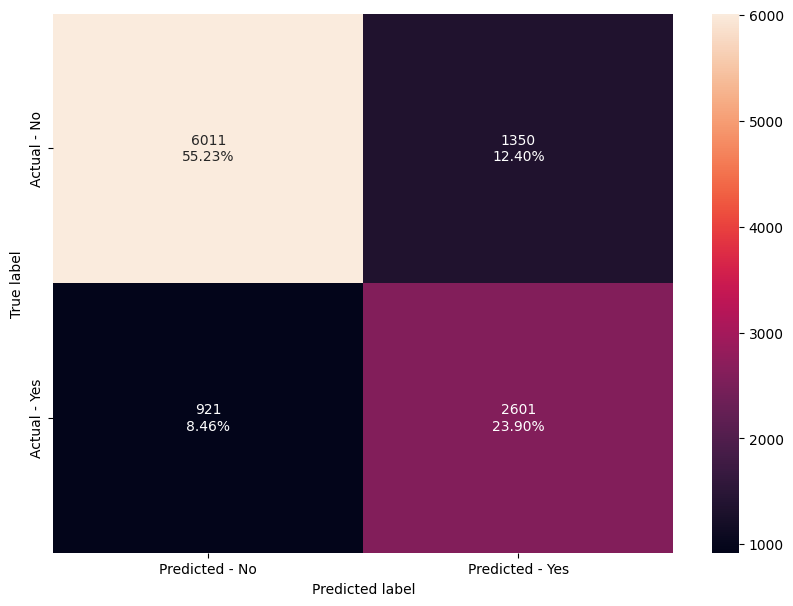

In [ ]:
make_confusion_matrix(dTree1, y_test)

In [ ]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.7844202898550725
Accuracy on test set :  0.7913259211614444
Recall on training set :  0.7315556618438359
Recall on test set :  0.7385008517887564


Recall on training set has reduced from 0.99 to 0.73 but this is an improvement because now the model is not overfitting and we have a generalized model.
Recall value is the same for both sets

In [ ]:
feature_names = list(X.columns)
print(feature_names)

plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


KeyboardInterrupt: ignored

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?